In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head() # O/P - charges ; #Sex , smoker , region - Categorical Data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe() #Returns statistical inference of your dataset 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Feature Engineering 

In [10]:
Male = pd.get_dummies(df['sex']) #Divides 'sex' into it's components . 

In [11]:
Male 

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [12]:
Male = pd.get_dummies(df['sex'], drop_first = True) # drop_first = True , It will remove one of the parameter . 
df = pd.concat([df, Male], axis =1)

In [9]:
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
Smoker = pd.get_dummies(df['smoker'], drop_first = True)
df = pd.concat([df, Smoker], axis =1)

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [16]:
df = df.rename(columns = {'yes':'Smoker'})

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [18]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [39]:
Region = pd.get_dummies(df['region'] , drop_first = True)
df = pd.concat([df,Region] , axis = 1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


# Exploratory Analysis

<AxesSubplot:xlabel='sex', ylabel='count'>

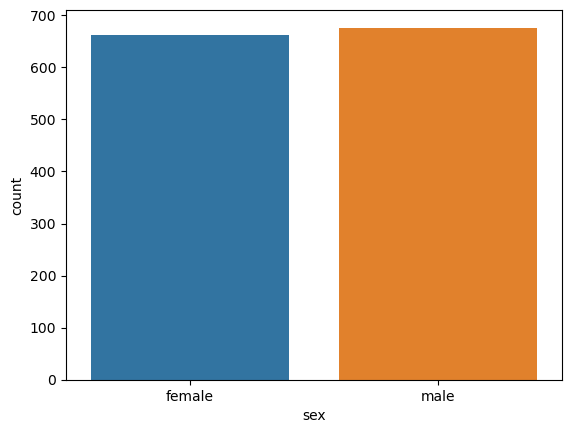

In [19]:
sns.countplot(x='sex', data= df)

In [20]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

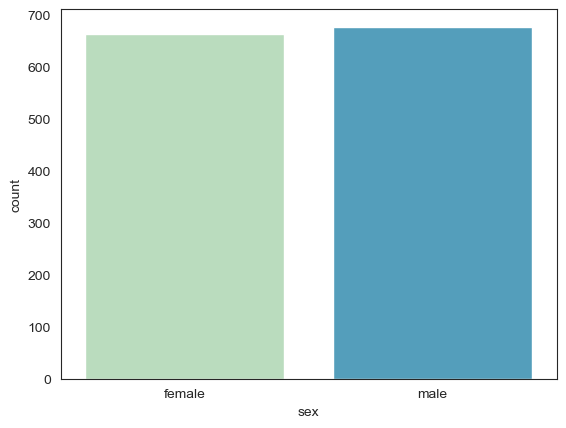

In [25]:
sns.set_style('white')#Though it's already white
sns.countplot(x='sex', data= df ,palette = 'GnBu' )

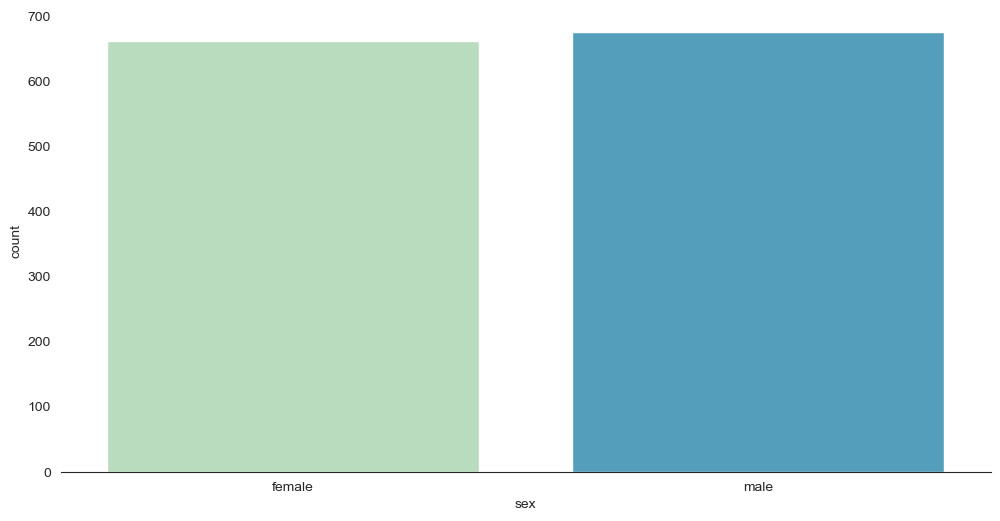

In [26]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.countplot(x='sex', data= df, palette = 'GnBu')
sns.despine(left = True) #To remove black boxes

In [ ]:
#Distribution of Sex Parameter 

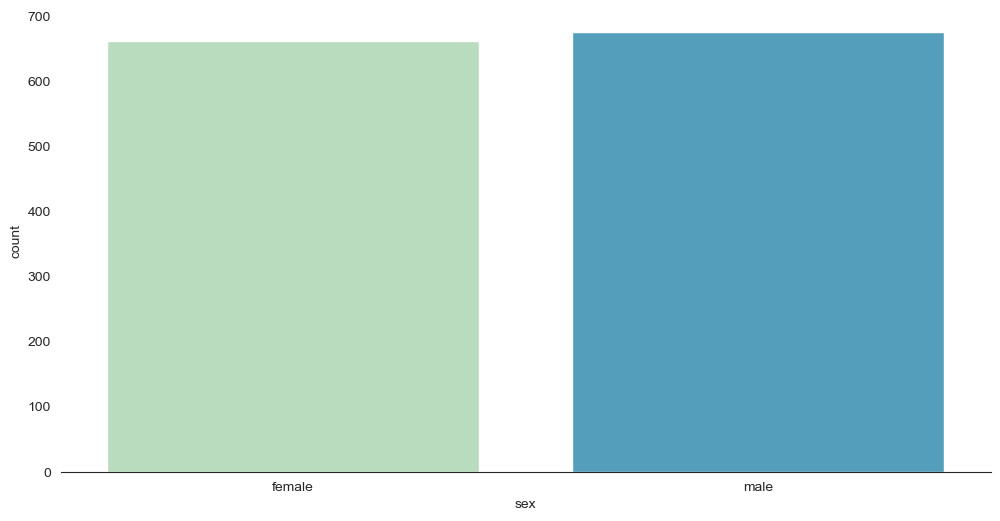

In [37]:
plt.figure(figsize = (12,6))# 12 is width , 6 is ht.
sns.set_style('white')
sns.countplot(x="sex", data = df, palette ='GnBu')
sns.despine(left = True)

In [32]:
#Relationship of Smoking to Charges

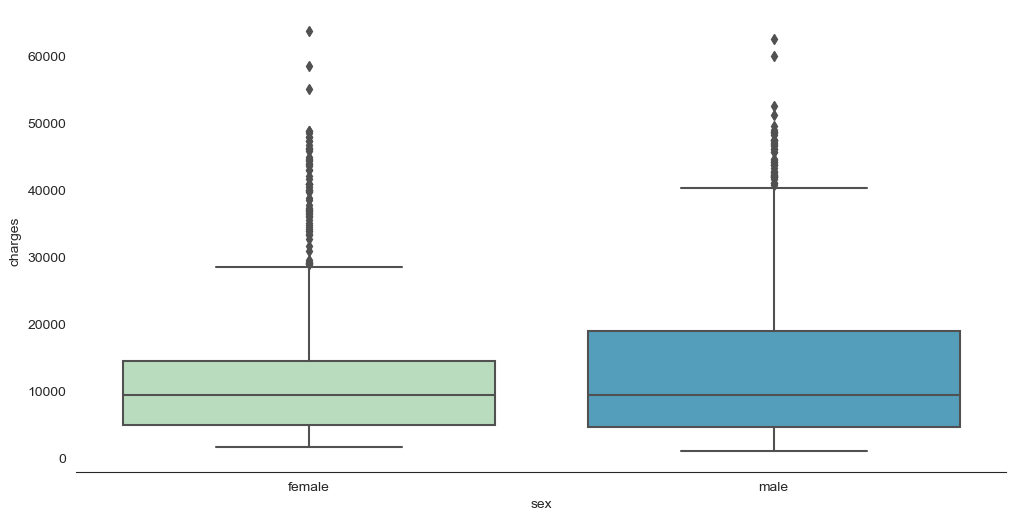

In [42]:
plt.figure(figsize = (12,6))# 12 is width , 6 is ht.
sns.set_style('white')
sns.boxplot(x='sex', y = 'charges', data = df, palette ='GnBu')
sns.despine(left = True)

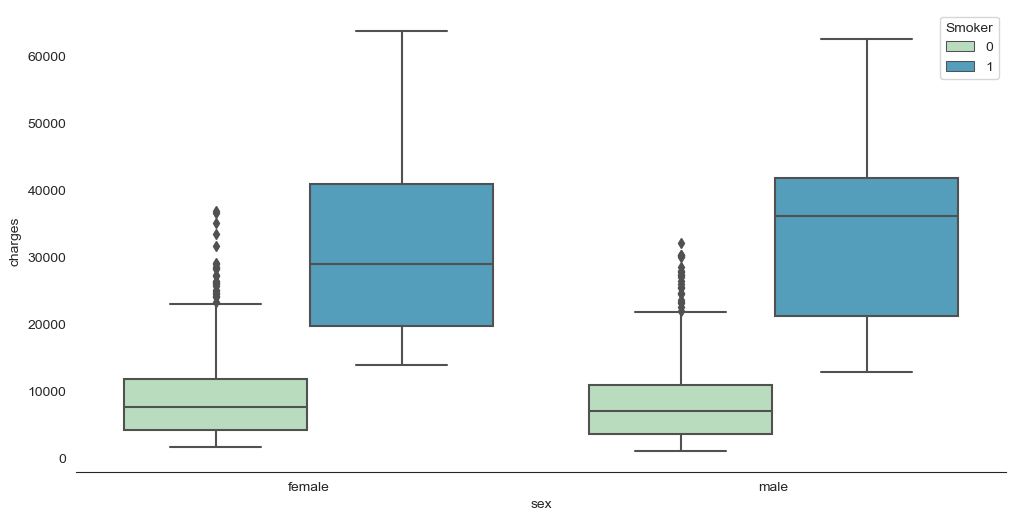

In [43]:
plt.figure(figsize = (12,6))# 12 is width , 6 is ht.
sns.set_style('white')
sns.boxplot(x='sex', y = 'charges', data = df, palette ='GnBu', hue = 'Smoker')
sns.despine(left = True)

<AxesSubplot:xlabel='age', ylabel='charges'>

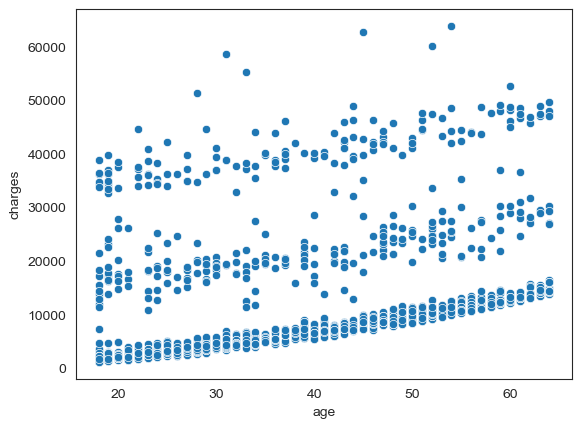

In [44]:
sns.scatterplot(x = 'age', y = 'charges', data =df)

<AxesSubplot:xlabel='age', ylabel='charges'>

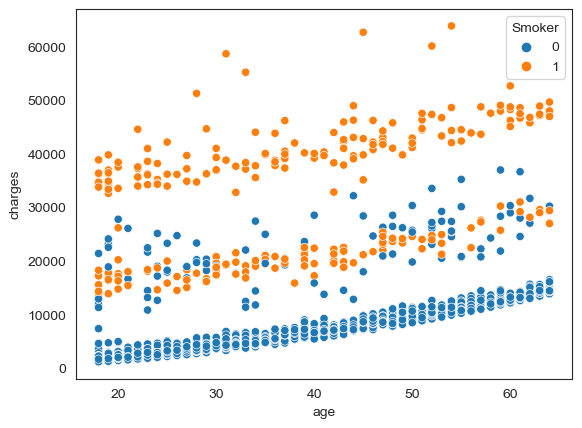

In [45]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'Smoker')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

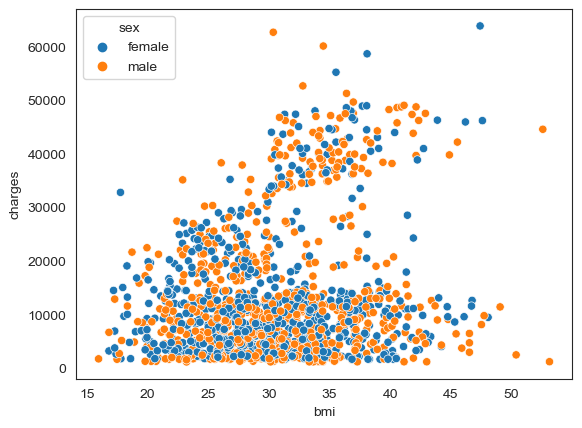

In [46]:
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'sex')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

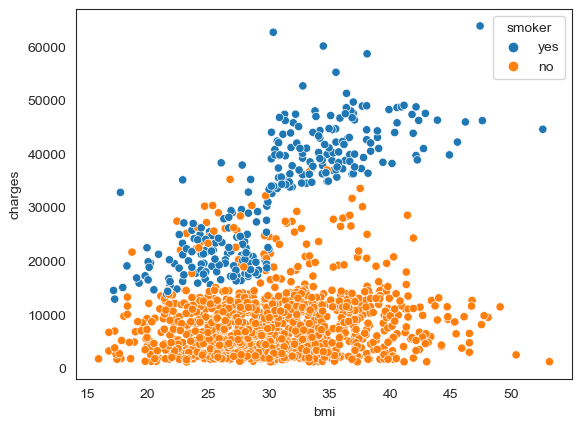

In [47]:
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'smoker')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

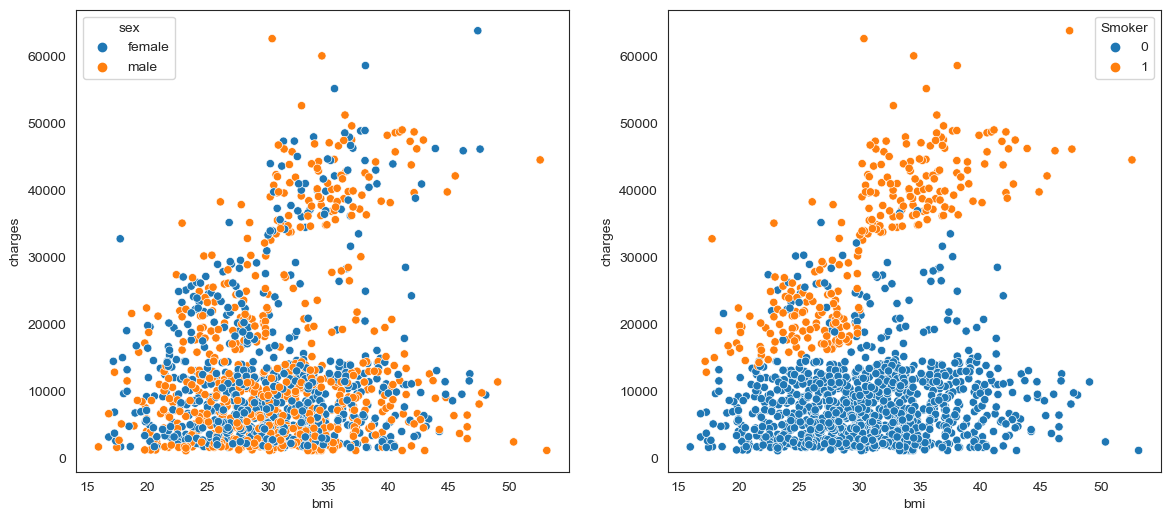

In [48]:
fig, ax = plt.subplots(nrows= 1, ncols = 2, figsize= (14,6))
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'sex', ax= ax[0]) #ax[0] will be plot 1 
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'Smoker', ax = ax[1]) #ax[1] will be plot 2

In [ ]:
df.drop(['sex', 'region', 'smoker'], axis=1, inplace=True)

In [56]:
df.head()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<AxesSubplot:>

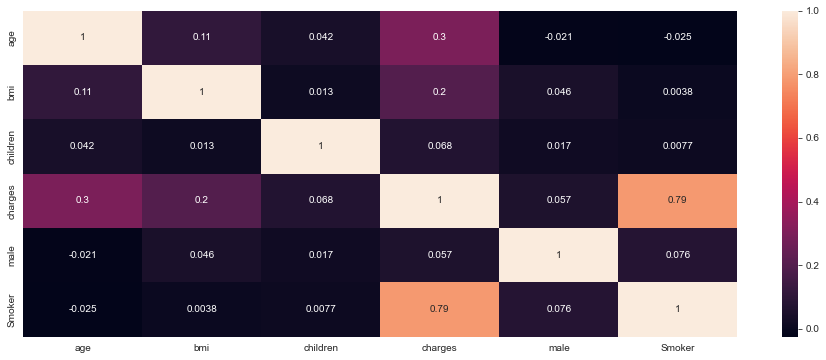

In [24]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot = True)

# Splitting the data

In [58]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [59]:
x.head()

,age,bmi,children,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4)

In [61]:
x_train.shape , x_test.shape

((802, 8), (536, 8))

In [62]:
df.head()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


# Scaling the Data

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #RobustScaler

In [65]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test) 
#No bias in the model now

In [31]:
scaled_x_train

array([[ 1.46530947, -0.80611099, -0.91084444, -1.01761142, -0.5186399 ],
       [-1.13640106, -0.89738081, -0.91084444, -1.01761142, -0.5186399 ],
       [ 0.38126341, -1.68518353,  1.61682768,  0.98269338, -0.5186399 ],
       ...,
       [-0.63051291, -0.51708987,  0.77427031,  0.98269338, -0.5186399 ],
       [-0.77505238, -0.46985373, -0.91084444,  0.98269338, -0.5186399 ],
       [ 0.67034236, -1.53306715, -0.06828707, -1.01761142, -0.5186399 ]])

In [66]:
scaled_x_test

array([[-1.24043522, -0.27036253, -0.90327585, ..., -0.57063108,
        -0.6013567 , -0.56871112],
       [-1.45439228,  0.83977511, -0.90327585, ...,  1.75244572,
        -0.6013567 , -0.56871112],
       [ 0.68517839, -0.55582649, -0.90327585, ..., -0.57063108,
         1.66290656, -0.56871112],
       ...,
       [ 0.25726425,  0.3506468 ,  0.71918156, ..., -0.57063108,
        -0.6013567 ,  1.75836195],
       [ 1.32704959,  0.86815457, -0.90327585, ..., -0.57063108,
        -0.6013567 ,  1.75836195],
       [-1.45439228, -0.11677958, -0.90327585, ..., -0.57063108,
        -0.6013567 ,  1.75836195]])

# Support vector Regression Model

In [67]:
from sklearn.svm import SVR

regressor = SVR()
regressor.fit(scaled_x_train, y_train)


SVR()

In [68]:
predict = regressor.predict(scaled_x_test)

In [69]:
predict

array([9366.34572055, 9381.80900777, 9412.64201463, 9391.53513776,
       9375.9931896 , 9438.46727298, 9431.5023418 , 9373.91748957,
       9412.6720873 , 9402.57749514, 9433.77402284, 9430.01776295,
       9388.12498983, 9388.88920079, 9395.36875132, 9438.25283552,
       9398.18204905, 9431.94556949, 9395.51672795, 9382.07217256,
       9416.10517947, 9380.01029863, 9434.79414733, 9410.02069431,
       9410.5551334 , 9379.39228145, 9385.33538041, 9372.43844525,
       9414.94334301, 9429.21863142, 9417.25545121, 9368.92551269,
       9439.19668941, 9440.83089802, 9399.24428957, 9401.01538629,
       9428.1933284 , 9384.38161395, 9400.32334251, 9454.9856361 ,
       9382.9812021 , 9382.61692662, 9402.66487558, 9406.57691449,
       9442.34219578, 9402.73353824, 9379.58762457, 9401.37923103,
       9467.76279866, 9446.26945707, 9372.13395919, 9454.44154853,
       9436.32600614, 9380.24768218, 9456.85143117, 9377.83465763,
       9389.32036204, 9376.97120573, 9386.49847343, 9415.32029

In [72]:
predict[:10]

array([9366.34572055, 9381.80900777, 9412.64201463, 9391.53513776,
       9375.9931896 , 9438.46727298, 9431.5023418 , 9373.91748957,
       9412.6720873 , 9402.57749514])

In [70]:
predict.shape

(536,)

In [71]:
y_test.shape

(536,)

In [35]:
np.mean((y_test - predict)**2)

155800360.6461954

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Predict')

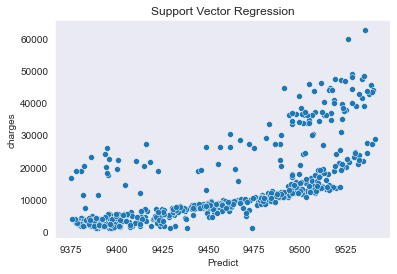

In [36]:

sns.set_style('dark')
f = sns.scatterplot(predict,y_test)
f.set_title('Support Vector Regression')
f.set_xlabel('Predict')